# COGS 108 - Final Project 

# Overview

Social media such as Twitter is a powerful tool for customer feedback due to the public nature of the feedback as well as the sheer volume produced. We explore how airline companies can benefit from the customer feedback on Twitter by analyzing a dataset composed of tweets on major airline companies from 2015, categorizing the words in individual tweets as “positive”, “negative”, or “neutral, and creating a classifier for future tweet analyzing. The most used words for each category are put into a frequency bar chart and word cloud for clarity, and the airlines get a bar chart not just for total feedback for each category, but the percentage of negative feedback relative to total feedback as well.

# Names

- Yixin Chen
- Mebrihit Zere
- Zachary Nguyen
- Young Li
- Qifan Chen

# Group Members IDs

- A13824695
- A15716263
- A15750169
- A13750891
- A14767906

# Research Question

Question 1. Which feedback type has a dominant position? Which airline(s) is(are) the worst according to these feedback?

Question 2. Which words are the most prevalent, for all positive feedback, neutral feedback, and negative feedback?

Question 3. Create a model which can identify airline sentiments of future Tweets.

## Background and Prior Work

   There are around 500 million tweets sent per day or around 200 billion a year. This immense amount of data can be used for a multitude of things including collecting customer feedback. Companies can convert these communications to their advantages and better understand and meet the needs of the consumer. “Social media is often where passengers turn to voice their opinions in real time,” said Ronni Kenoian, manager of marketing and ecommerce at InsureMyTrip. We intend to use a dataset that contains tweets with feedback about airline companies and use it in a way that would help us analyze the customer sentiment of these companies. More on this in the following sections.

   There are other projects who have asked similar questions and approached similar problems. For example, in https://www.kaggle.com/oguzhany/2015-flight-delays-and-cancellations, the authors used 2015 Flight Delays and Cancellations dataset to find out the delay and cancellation causes in several aspects. This project asked similar questions and approached similar problems compared to ours, because both projects look into flights in the United States. We both try to improve the flight experiences of customers. However, this project looks just at flight delays and cancellations rather than the broader array of sentiments that we will be analyzing. Inspired by such projects, we want to do more research from the customers' side and try to see in which aspects those airlines can improve their quality. We also want to see positive and neutral feedback of these companies as well.
    
   We also explored different articles about airlines and how they influence our perception and hypothesis on which would be the most negative airlines. The most prevalent and well known article addresses a doctor being violently dragged off a United Airlines flight due to overbooking [2]. Another appalling article about United had to due with a puppy being forced to be put into an overhead bin and dying as a result [3]. Delta had a similar pet problem with a cat freezing to death in a cargo hold on a Delta flight [4]. In an article about the most shocking airline stories of 2018, American and United looked to have the most mentions [5]. The list of things going wrong continues with more animal deaths and passengers being mistreated on United [6]. Although these news articles skew heavily in showing distaste toward United and American, the news usually only shows the worst incidents while the tweets can have day to day minor issues or positives that can change how we see these companies.

References (include links):

1) - https://www.dsayce.com/social-media/tweets-day/

2) - https://www.nytimes.com/2017/04/25/business/united-airlines-david-dao-passenger.html

3) - https://www.npr.org/sections/thetwo-way/2018/03/14/593479827/dog-dies-in-overhead-bin-on-united-flight-airline-apologizes

4) - http://www.nbcnews.com/id/41281428/ns/travel-news/t/owner-kitten-froze-death-planes-cargo-hold/

5) - https://www.businessinsider.com/most-shocking-airline-stories-of-year-2018-12#a-monkey-escaped-his-baggage-on-an-american-airlines-flight-in-san-antonio-may-8

6) - https://www.news.com.au/travel/travel-updates/how-things-went-from-bad-to-so-much-worse-for-worlds-third-largest-airline/news-story/6a240f5dd5c2408cb6d4f1f322c75bc3



# Hypothesis


   We believe that people leaving online reviews or sentiments, especially on something like Twitter, are more likely to leave a negative review than a neutral or positive one. This may be due to the customer seeking some type of recompense for a negative experience they could have had with their flight experience. Another reason would be to warn other potential customers from spending money on a product or service that they themselves had a bad experience with. A customer has little to gain by making their positive experience feedback public but can perhaps get a little “revenge” at a company that by making their negative experience public and possibly hurting the company’s sales. Although the data we have comes from 2015, we still hypothesize that United Airlines will still have the most negative feedback out of the major airline companies due to a rough track record of poor customer service. Much of the articles that were observed in the background section took place after 2015 but we feel that they are still predictive of which airlines had the most negative feedback on Twitter in 2015. United and American airlines showed up often with negative news articles and United had some particularly damaging incidents. As for the negative words that are most prevalent, we expect to see an array of words such as: “late”, “cancelled”, “service”, “rude”, “slow”, “dirty”, “crowded”, “disappointed”, “upset”, “damage”, and  “policy”, as well as many synonyms of the word “bad”. Neutral is more difficult to predict but perhaps words like “please”, “help”, “travel”, “airline”, and “fine” will appear more frequently. When it comes to the positive words, we predict that “good” and its synonyms, “thanks”, “perfect”, “quick”, “comfortable”, “clean”, and “love” will be among the most prevalent. Finally, we think that the model we create to identify future airline sentiment tweets and classify them under “negative”, “neutral”, or “positive” will have a fairly high accuracy rate of around 70% - 80%. We chose this accuracy range because we think the majority of tweets will have specific keywords that will make their categorization fairly straightforward. The relatively low word count for tweets works in our favor here as there is less chance for a tweet to have a large combination of words from multiple categories.

# Dataset(s)

- Dataset Name: Twitter US Airline Sentiment
- Link to the dataset: https://www.kaggle.com/crowdflower/twitter-airline-sentiment
- Number of observations: 14640 rows

The dataset we use is from kaggle.com (www.kaggle.com/crowdflower/twitter-airline-sentiment), and the original data came from Crowdflower's Data for Everyone Library (https://www.figure-eight.com/data-for-everyone/). It is used to analyze how travelers in February
2015 expressed their feelings on Twitter. The dataset is in the form of CSV file and  SQLite
database. We choose to use CSV file in our project. It is nice, clear, and already in an organized
format where one row has all the information about one Tweet. The dataset variables are: tweet_id,
airline_sentiment, airline_sentiment_confidence, negative reason, negativereason_confidence,
airline, airline_sentiment_gold, name, negativereason_gold, retweet_count, text, tweet_coord,
tweet_created, tweet_location, and user_timezone.


# Setup

We use panda and numpy to help us analyze the data, matplotlib, wordcloud and PIL for data visualization, and sklearn for classification model in machine learning.

In [1]:
from PIL import Image
from sklearn import svm
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import collections
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd

# Data Cleaning

We need to load the Twitter US Airlines Sentiment CSV file into jupyter notebook. Then we can do data cleaning based on that.

In [2]:
tweets = pd.read_csv('Tweets.csv')

Then we can checkout the data by getting the first five rows of tweets.

In [3]:
# Check out the data
tweets.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Check out the frequency of all possible values in negativereason_gold, airline_sentiment_gold, 
# retweet_count and tweet_coord
tweets['negativereason_gold'].value_counts()

Customer Service Issue                      12
Late Flight                                  4
Can't Tell                                   3
Cancelled Flight                             3
Cancelled Flight\nCustomer Service Issue     2
Flight Attendant Complaints                  1
Customer Service Issue\nCan't Tell           1
Late Flight\nLost Luggage                    1
Bad Flight                                   1
Lost Luggage\nDamaged Luggage                1
Late Flight\nFlight Attendant Complaints     1
Late Flight\nCancelled Flight                1
Customer Service Issue\nLost Luggage         1
Name: negativereason_gold, dtype: int64

In [5]:
tweets['airline_sentiment_gold'].value_counts()

negative    32
positive     5
neutral      3
Name: airline_sentiment_gold, dtype: int64

In [6]:
tweets['retweet_count'].value_counts()

0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
9         1
31        1
18        1
15        1
28        1
44        1
11        1
Name: retweet_count, dtype: int64

In [7]:
tweets['tweet_coord'].value_counts()

[0.0, 0.0]                      164
[40.64656067, -73.78334045]       6
[40.64646912, -73.79133606]       3
[32.91792297, -97.00367737]       3
[33.75348859, -116.36209633]      2
                               ... 
[29.98877308, -95.33846478]       1
[42.2822248, -71.0378408]         1
[40.77471899, -73.86957658]       1
[26.37067479, -80.10215823]       1
[41.28597403, -72.44456912]       1
Name: tweet_coord, Length: 832, dtype: int64

According to the printed rows and column names above, we can know all the columns we have. There are three columns that are not very useful, negativereason_gold, airline_sentiment_gold, retweet_count and tweet_coord. On the one hand, some of them have a large number of unmeaningful values. For example, in 'retweet_count' 13873 rows out of 14640 rows have a value 0. As for 'airline_sentiment_gold', only 40 rows out of 14640 rows have a value, with empty values for all others. On the other hand, some of the columns are not very useful for us, such as 'negativereason_gold' and 'tweet_coord'. Therefore, we can remove these columns in order to keep our dataset clean, so we can develop our analysis more clearly based on the information given.

We have also dropped tweet_location, tweet_created, user_timezone and name as these pieces of data will not contribute to our analysis.

In [8]:
tweets.drop('negativereason_gold', axis=1, inplace=True)
tweets.drop('airline_sentiment_gold', axis=1, inplace=True)
tweets.drop('retweet_count', axis=1, inplace=True)
tweets.drop('tweet_coord', axis=1, inplace=True)

tweets.drop('tweet_location', axis=1, inplace=True)
tweets.drop('tweet_created', axis=1, inplace=True)
tweets.drop('user_timezone', axis=1, inplace=True)
tweets.drop('name', axis=1, inplace=True)
#tweets.drop('',axis=1, inplace=True)

# Check the current list of columns
list(tweets.columns)

['tweet_id',
 'airline_sentiment',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'text']

Since the texts contain lots of unmeaningful words, such as 'I', 'you', 'the' , 'to', which will not help in the analysis. We put all such unmeaningful words in a list. If the word we are looking at is in the unmeaningful word list, we will remove it from the text. Also, if there are special characters, @airline/username, or empty string, we should remove these words from the text as well.

In [9]:
unmeaningful = ['i', 'you', 'me', 'to', 'the', 'a', 'my', 'is', 'in', 'and', 'for', 'on', 'of', 
                'your', 'so', 'was', 'have', 'it', 'at', 'with', 'that', 'from', 'do', 'get', 
                'but', 'this', 'can', 'just', 'they', 'we', 'are', 'an', 'be', "i'm", 'will', 
                'if', 'had', 'our', 'about', 'there', 'has', 'been', '-', 'by', 'like', 'or', 
                'as', 'he', 'she', 'it', 'us', 'has' ,"i've", "it's", "don't", 'would', 'am',
               'flight', 'customer', 'any', 'very', "didn't", "you've", 'thing', 'take',
               'other', 'u', '', ' ']

In [10]:
def clean_text(str_in):
    """Remove special characters, @airline/username, empty string and
    unmeaningful words from the original text.

    Args:
        str_in: A string representing a Tweet.

    Returns:
        A string similar to the input string, but it does not have
        special characters, @airline, empty word, or any unmeaningful
        words listed above. For example:

        "thanks"
    """
    res = ""
    str_in = str_in.lower()
    str_arr = str_in.split(' ')
    for word in str_arr:
        # make all words into lower case
        word = word.lower()
        # remove not useful words from the original text
        if '@' in word or word == '' or word[:1] == '&':
            continue
        if word.lower() in unmeaningful:
            continue
        if word.isnumeric():
            continue
        res = res + " " + word
    return res

Having the `clean_text` function defined, we can use `clean_text` to transform the data in column 'text'.

In [11]:
tweets["text"] = tweets["text"].apply(clean_text)

Here is how our data looks now.

In [12]:
tweets.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,what said.
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,plus added commercials experience... tacky.
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,today... must mean need another trip!
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,"really aggressive blast obnoxious ""entertainm..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,really big bad


# Data Analysis & Results

## Question 1. Which feedback type has a dominant position? Which airline(s) is(are) the worst according to these feedback?

Now let's address our first question "is negative feedback dominant". 
Notice that our data has an airline_sentiment_confidence value that is a double. We can sum up the values for that to determine whether the count for negative is higher than neutral and positive combined. Since the highest value for the confidence is 1, if the confidence for the sentiment is 100%, it will conveniently add 1 to our count for total number of negative comments. Otherwise, we will be adding a decimal value to our total, since the confidence of that sentiment isn't 100%, only a portion will count. 

Here we will aim to set up the sum of every sentiment type to begin our analysis.



### Part 1) Count the neutral, positive and negative comments.

In [13]:
sentiments = tweets['airline_sentiment'].unique()
#here we know there are 3 types only 
sentiments

array(['neutral', 'positive', 'negative'], dtype=object)

In [14]:
total_negative = tweets[tweets['airline_sentiment'] == 'negative']['airline_sentiment_confidence'].sum()
total_positive = tweets[tweets['airline_sentiment'] == 'positive']['airline_sentiment_confidence'].sum()
total_neutral = tweets[tweets['airline_sentiment'] == 'neutral']['airline_sentiment_confidence'].sum()

values = [total_neutral, total_positive, total_negative]
dictionary1 = {'Airline Sentiment':sentiments, 'Count':values} 

dfSentimentCount = pd.DataFrame(dictionary1)
dfSentimentCount.head(3)

,Airline Sentiment,Count
0,neutral,2551.4171
1,positive,2060.6280
2,negative,8566.4269


### Data Visualization

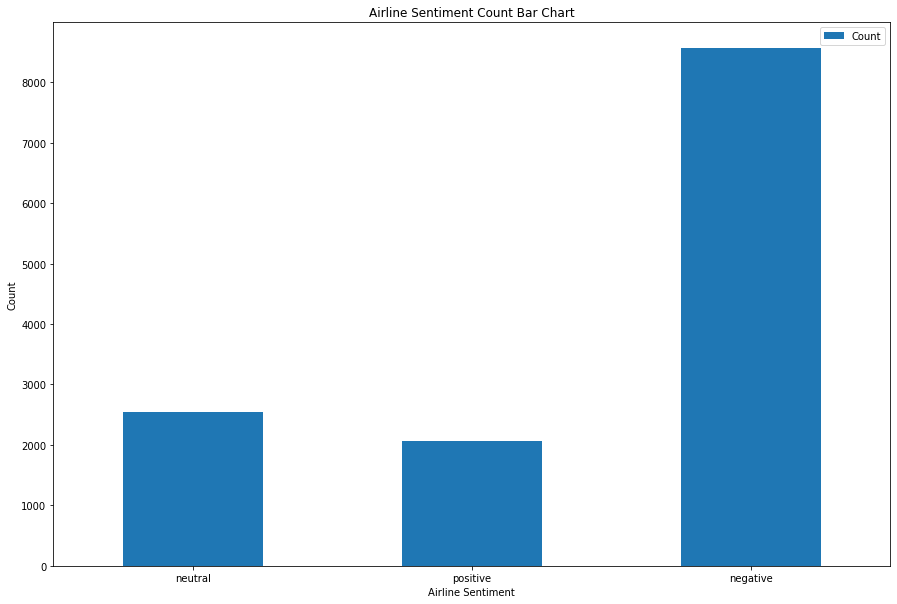

In [15]:
temp = dfSentimentCount.plot.bar(x='Airline Sentiment', y='Count', rot=0, figsize=(15,10))

# Add title and axis names
plt.title('Airline Sentiment Count Bar Chart')
plt.xlabel('Airline Sentiment')
plt.ylabel('Count')
 
# Show graphic
plt.show()

Here, we can clearly see that these tweets are overwhelmingly negative. While we can consider that some of the positive tweets and neutral tweets did not have a 1.000 confidence value, we can safely say that there are more negative tweets.

Let's move onto the second part of our Analysis, checking which airline has the most negative feedback. 
This can be done by making a dataframe with every airline, and counting neutral, positive and negative for every airline. 

### Part 2) Count the neutral, positive and negative comments for each airline.

Lets start by taking the list of unique airlines. Then for each of these airlines we will count the number of comments for every type of the sentiment types.

In [16]:
listOfAirlines = tweets['airline'].unique()
listOfAirlines

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

### Data Visualization

Here, we are going to gather the neutral, positive and negative count for every airline and make a dataframe out of it. Notice here that we are also getting the total count of the feedback in terms of sentiment cconfidence per airline.

In [17]:
neutralCount = []
positiveCount = []
negativeCount = []
totalCount = []

for airline in listOfAirlines:
    neuC = tweets.query("airline == @airline and airline_sentiment == 'neutral'")['airline_sentiment_confidence'].sum()
    posC = tweets.query("airline == @airline and airline_sentiment == 'positive'")['airline_sentiment_confidence'].sum()
    negC = tweets.query("airline == @airline and airline_sentiment == 'negative'")['airline_sentiment_confidence'].sum()
    tot = neuC + posC + negC
    neutralCount.append(neuC)
    positiveCount.append(posC)
    negativeCount.append(negC)
    totalCount.append(tot)

df2 = pd.DataFrame(index=listOfAirlines);
df2['Neutral Count'] = neutralCount
df2['Positive Count'] = positiveCount
df2['Negative Count'] = negativeCount
df2

,Neutral Count,Positive Count,Negative Count
Virgin America,143.3610,134.9727,163.2137
United,564.4000,421.1578,2457.5967
Southwest,548.5365,505.0800,1091.7521
Delta,599.5580,471.7084,861.6031
US Airways,313.1524,231.2555,2140.1501
American,382.4092,296.4536,1852.1112


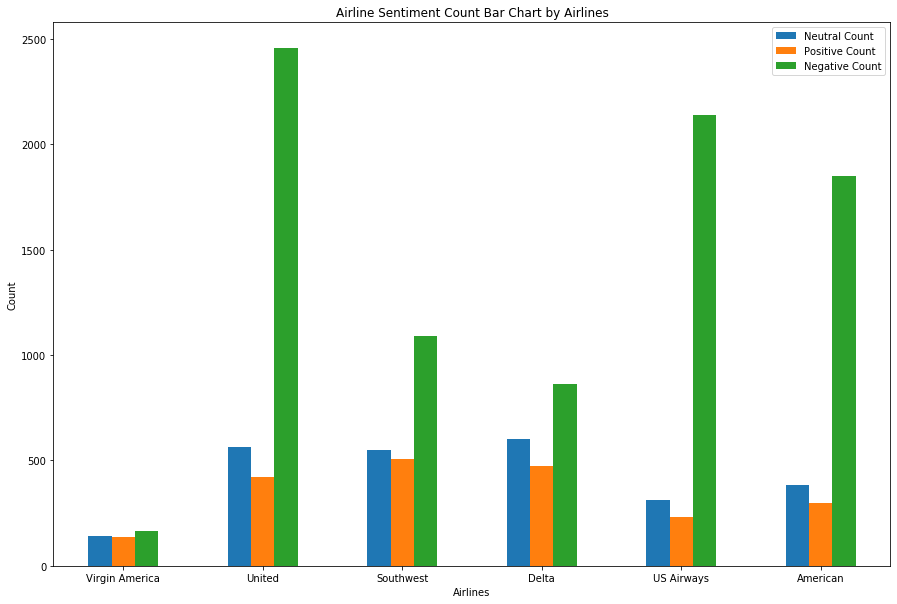

In [18]:
plt2 = df2.plot.bar(rot=0, figsize=(15,10))

# Add title and axis names
plt.title('Airline Sentiment Count Bar Chart by Airlines')
plt.xlabel('Airlines')
plt.ylabel('Count')
 
# Show graphic
plt.show()

From this graph, we can know how neutral count, positive count and negative count seperately. We use bar chart because it is more clear to see the three counts of different airlines. According to count, it looks like United Airlines has the most negative feedback. We can also separate the bar chart above into three different charts for clear views. These three charts are neutral count, positive count, and negative count. It shows as follows.

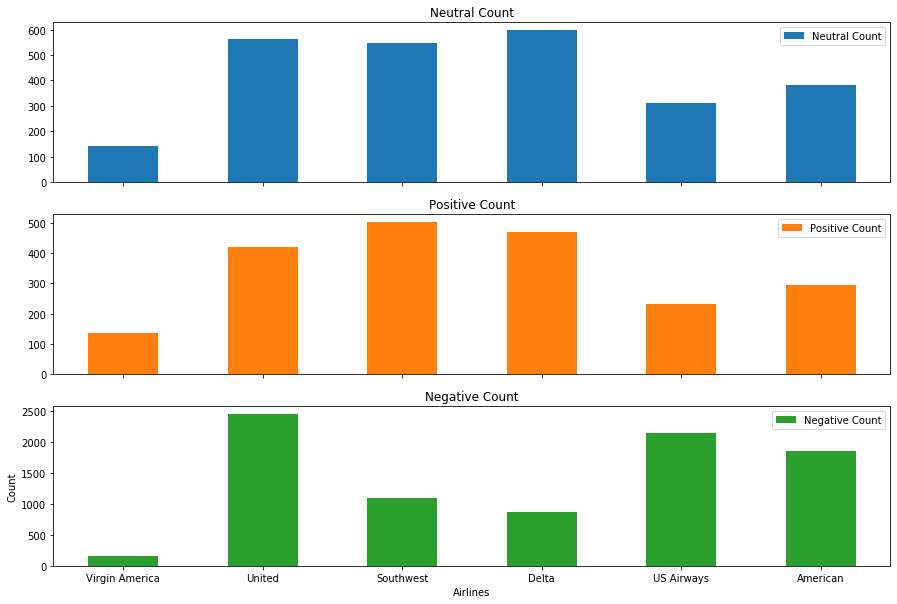

In [19]:
plt3 = df2.plot.bar(rot=0, subplots=True, figsize=(15,10))

# Add axis names
plt.xlabel('Airlines')
plt.ylabel('Count')
 
# Show graphic
plt.show()

Here we can immediately see that United has the most Total amount of negative comments. However, is this enough for us to conclude that United receives the most negative comments? 
Not Exactly, this is because if we take a look at US airways, it seems like US Airways might have a higher percentage of negative comments than United. We still have to take into account the positive comments they receive.

To proceed, we calculate the percentage of feedback that is negative with the total amount calculated above. Then we can make a more fair comparison. 
We will do this by getting the negative count and divide it with the total count.

In [20]:
percentNeg = []
for neg, tot in zip(negativeCount, totalCount):
    perc = neg/tot
    percentNeg.append(perc)
    
df3 = pd.DataFrame(index=listOfAirlines)
df3['Negative Feedback %'] = percentNeg
df3

,Negative Feedback %
Virgin America,0.369640
United,0.713763
Southwest,0.508888
Delta,0.445764
US Airways,0.797208
American,0.731778


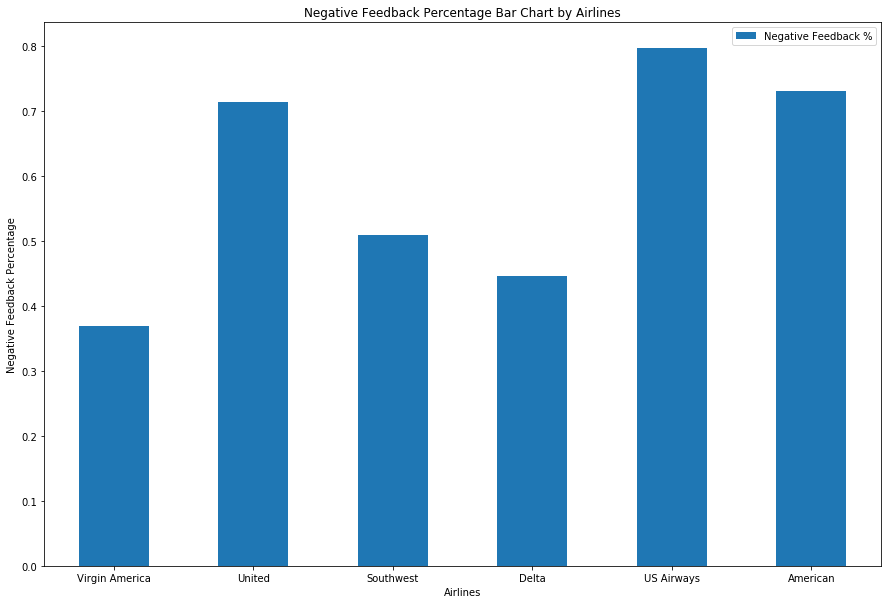

In [21]:
plt4 = df3.plot.bar(rot=0, figsize=(15,10))

# Add axis names
plt.title('Negative Feedback Percentage Bar Chart by Airlines')
plt.xlabel('Airlines')
plt.ylabel('Negative Feedback Percentage')
 
# Show graphic
plt.show()

After some analysis, we can see a clear winner. Us Airways has the highest percentage of negative feedback, followed by American Airlines surprisingly. 

When we look at which airline is the worst, we not only need to look at the negative counts, but also the total counts. The most number of negative feedback does not mean the airline is the worst. Let's assume there are two airlines. One airline has the most number of negative feedback, while it has a very large amount of feedback in total because there are lots of positive and neutral feedbacks as well. The other airline has less negative feedback, but also less positive or neutral feedback. In this case, the second airline is the worse because customers tend to give negative feedbacks and deny its quality.

Therefore, our hypothesis was disproven.

## Question 2. Which words are the most prevalent, for all positive feedbacks, neutral feedbacks, and negative feedbacks?

Next, it is our mission to explore which words are the most prevalent in all three kinds of feedbacks, including positive feedback, neutral feedback and negative feedback, and see if that data can be useful in future experiments. We can do this by creating a dictionary and counting the words of every tweet. This requires going through every string in our 'text' column of our tweets dataframe and checking if that string contains a certain word. If the word is valid and it is not in the unmeaningful word list, the function will increase the frequency count by 1; otherwise, the word is ignored, and the function will move to check the next word.

First of all, we will get 3 lists of text based on their airline sentiment types. For example, the negative_text list contains all texts (Tweets) whose airline_sentiment column value is 'negative'. Same for neutral_text and positive_text. Since we cleaned and transformed the 'text' column before, all texts do not have any special characters, @airline/username, empty string, or unmeaningful words.

In [22]:
negative_text = tweets[tweets['airline_sentiment'] == 'negative']['text']
neutral_text = tweets[tweets['airline_sentiment'] == 'neutral']['text']
positive_text = tweets[tweets['airline_sentiment'] == 'positive']['text']

We need to count frequency for all three lists. Therefore, instead of counting all words separately for three times, we can have a function `count_words` to count word frequencies in the input list and return its corresponding frequency dictionary. Such function will reduce repetitive code, improve coding style and make things effective.

In [23]:
def count_words(texts):
    """Count word frequency from the words in input list.

    Count word frequency for all the words in the input string list,
    excluding empty string.

    Args:
        texts: A list of Tweets, which is also a list of strings.

    Returns:
        A dict mapping words to the corresponding frequency in 
        the texts input list. For example:

        {'not': 1271,
         'no': 1213,
         'cancelled': 911}
         
        If the word is not existed in the texts input list, then that
        frequency cannot be found in the returning dict.
    """
    result = {}
    for text in texts:
        text_arr = text.split(' ')
        for word in text_arr:
            # exclude empty string
            if word == '':
                continue
            # increase the frequency count in the returning dict
            if word in result:
                count = result[word]
                result[word] = count + 1
            else:
                result[word] = 1
    return result

Having this function, we can get the frequency dictionary using the text lists we specified before. Then, we can sort the dictionary based on frequency, and convert the dictionaries into dataframes for data visualization. Then we can see how the words are ranked in a list view. 

In [24]:
negative_dict = count_words(negative_text)
neutral_dict = count_words(neutral_text)
positive_dict = count_words(positive_text)

In [25]:
sorted_negative_dict = sorted(negative_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_neutral_dict = sorted(neutral_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_positive_dict = sorted(positive_dict.items(), key=operator.itemgetter(1), reverse=True)

In [26]:
# convert dictionaries to dataframes
negative_df = pd.DataFrame(sorted_negative_dict, columns=['Word', 'Frequency'])
negative_df

,Word,Frequency
0,not,1271
1,no,1213
2,cancelled,911
3,now,643
4,service,541
...,...,...
18003,answers!,1
18004,"play,",1
18005,delays👌,1
18006,phones!,1


In [27]:
neutral_df = pd.DataFrame(sorted_neutral_dict, columns=['Word', 'Frequency'])
neutral_df

,Word,Frequency
0,need,159
1,please,146
2,how,141
3,what,140
4,when,136
...,...,...
8161,share.,1
8162,"george,",1
8163,process:,1
8164,http://t.co/4gr39s91dl”😂,1


In [28]:
positive_df = pd.DataFrame(sorted_positive_dict, columns=['Word', 'Frequency'])
positive_df

,Word,Frequency
0,thank,452
1,thanks,397
2,great,193
3,you!,134
4,love,119
...,...,...
6362,http://t.co/drw08djhai,1
6363,relations,1
6364,concerns,1
6365,"directly,",1


### Analysis

From the lists above, we can get a clear view of what words are more frequent to appear in three kinds of airline sentiments.

For negative feedback, "not", "no", "cancelled", "now" and "service" have high word frequencies. This means that people tend to question the airlines about their services and their cancelled flights on Twitter. The negation words like "not" and "no" represent that customers are trying to deny the quality of those airlines.

For neutral feedback, "need", "please", "how", "what" and "when" have high word frequencies. This means that customers looks forward to having changes in those airlines. These words do not have full negative attitudes, but these show the urgency that people wants to see changes from the airlines investigated.

For positive feedback, words like "thank", "thanks", "great", "you!" and "love" are the most frequent ones. This means people tend to appreciate the airlines when they have very good flying experiences. Even with "!", customers showed that they were happy and satisfied.

### Data Visualization

To better visualize the data, it is not enough to just show a list view of the words. For this question, besides the list views, we have two other ways for visualization. One is bar charts. We created three bar charts to show the word frequencies for negative feedback, neutral feedback and positive feedback. The other way is word cloud. Python has a package called worldcloud. By making use of that package, we can easily visualize the words with the most frequent word having the largest size. There are three wordclouds as well, one for negative feedback, one for neutral feedback, and one for positive feedback. 

The space is limited and we do not care much about the words with less frequencies. Therefore, let's checkout the frequency bar charts showing the top 50 words for negative, neutral and positive feedback first.

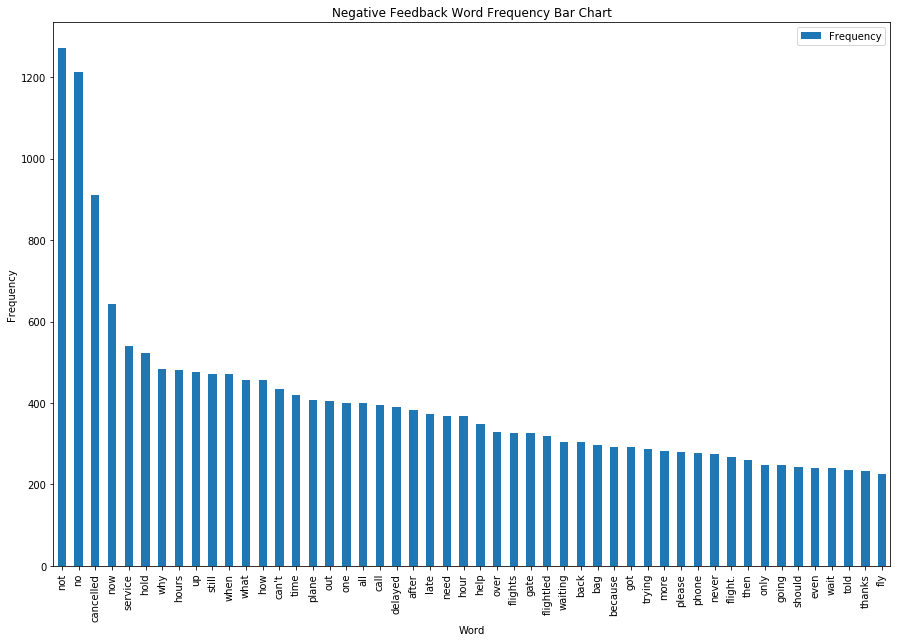

In [29]:
negative_df.set_index('Word')
plt5 = negative_df.head(50).plot.bar(x='Word', y='Frequency', figsize=(15,10))

# Add title and axis names
plt.title('Negative Feedback Word Frequency Bar Chart')
plt.xlabel('Word')
plt.ylabel('Frequency')
 
# Show graphic
plt.show()

From the bar chart above, we can see the top 50 most frequent words in negative feedback. Among these, "not", "no", and "cancelled" have much higher frequencies than other words. This means people tend to negate the airline when they are unhappy with its service. Also, "cancelled" shows that flight cancellation maybe the most important reason why customers are showing their negative feedback on Twitter. From such bar chart, we not only see the frequency rank of words in feedback, but also know which words have obviously higher frequency than others.

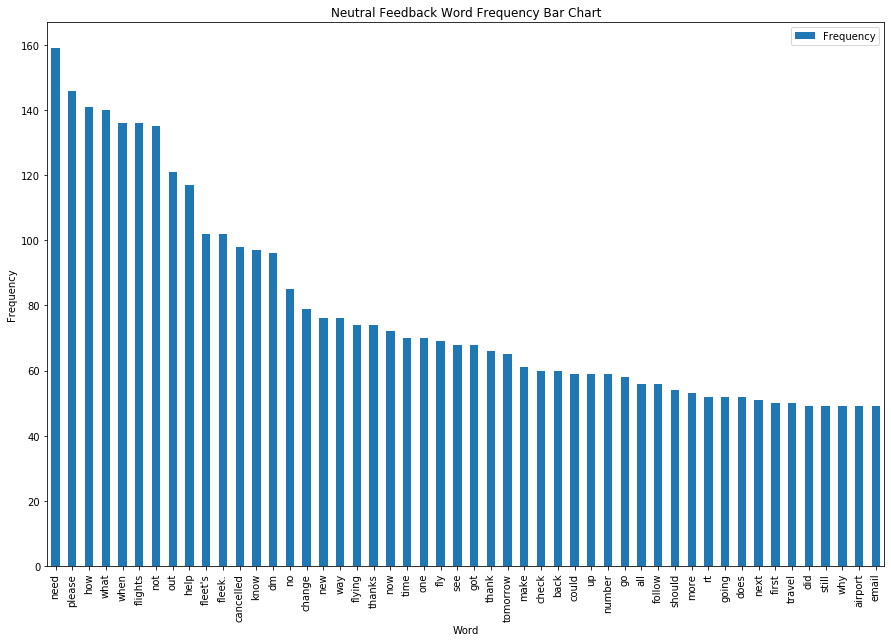

In [30]:
neutral_df.set_index('Word')
plt6 = neutral_df.head(50).plot.bar(x='Word', y='Frequency', figsize=(15,10))

# Add title and axis names
plt.title('Neutral Feedback Word Frequency Bar Chart')
plt.xlabel('Word')
plt.ylabel('Frequency')
 
# Show graphic
plt.show()

From the bar chart above, we can see the top 50 most frequent words in neutral feedback. Among these, "need", "please", "how", "what", "when", "flights", "not" have relatively higher frequencies than other words. 

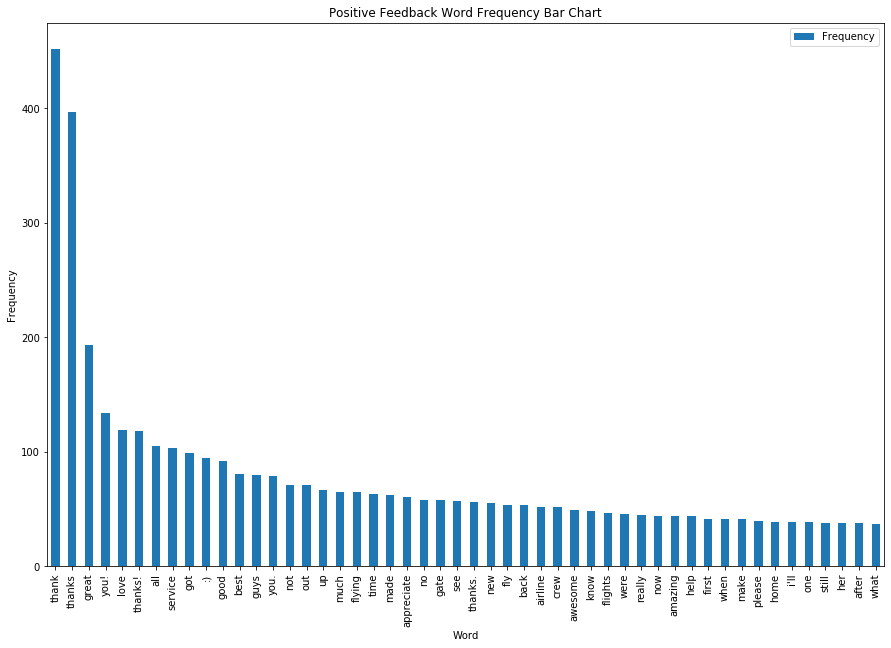

In [31]:
positive_df.set_index('Word')
plt7 = positive_df.head(50).plot.bar(x='Word', y='Frequency', figsize=(15,10))

# Add title and axis names
plt.title('Positive Feedback Word Frequency Bar Chart')
plt.xlabel('Word')
plt.ylabel('Frequency')
 
# Show graphic
plt.show()

From the bar chart above, we can see the top 50 most frequent words in positive feedback. Among these, "thank", "thanks", and "great" have relatively higher frequencies than other words. This shows people tend to appreciate the airline on social media when they have positive flight experience. 

Second, let's do another form of data visualization, the wordcloud. As we can see, the more frequent words are represented with a larger font size. Similarly, the less frequent words are represented with a smaller font size. The different colors in the wordcloud also help readers to clearly distinguish different words.

Wordcloud for Word Frequency from all Negative Feedback


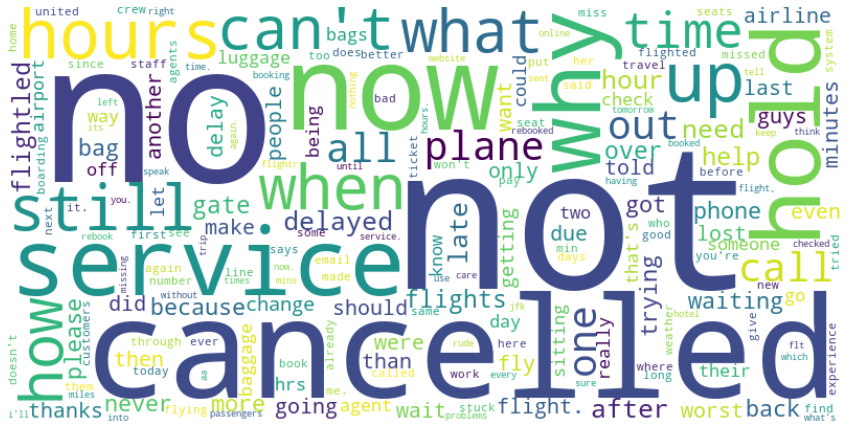

In [32]:
print("Wordcloud for Word Frequency from all Negative Feedback")

negative_wordcloud = WordCloud(background_color="white", width=800, height=400)
negative_wordcloud.generate_from_frequencies(negative_dict)
plt.figure(figsize=(15,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [33]:
np.array(negative_wordcloud).shape

(400, 800, 3)

The negative feedback wordcloud accords with our previous observation from the list and bar chart. "no", "not" and "cancelled" are the three most frequently appearing words for negative feedback on social media.

Wordcloud for Word Frequency from all Neutral Feedback


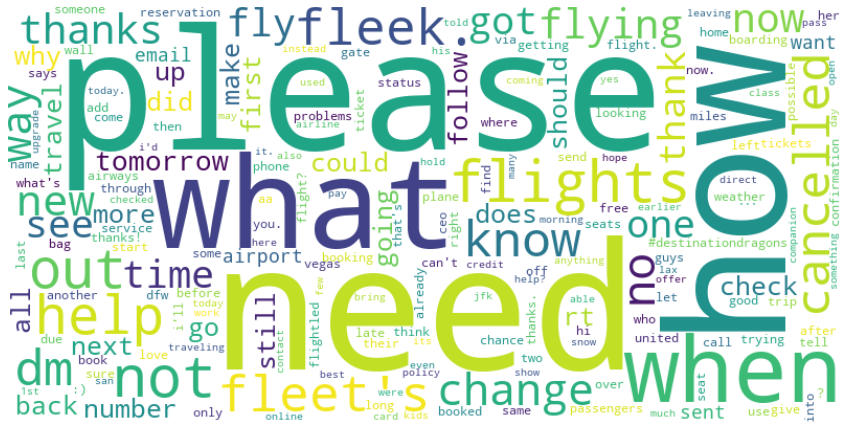

In [34]:
print("Wordcloud for Word Frequency from all Neutral Feedback")

neutral_wordcloud = WordCloud(background_color="white", width=800, height=400)
neutral_wordcloud.generate_from_frequencies(neutral_dict)
plt.figure(figsize=(15,10))
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The neutral feedback wordcloud accords with our previous observation from the list and bar chart. "need", "please", "how", "what", "when", "flights", "not" are the most frequently appearing words for neutral feedback on social media.

Wordcloud for Word Frequency from all Positive Feedback


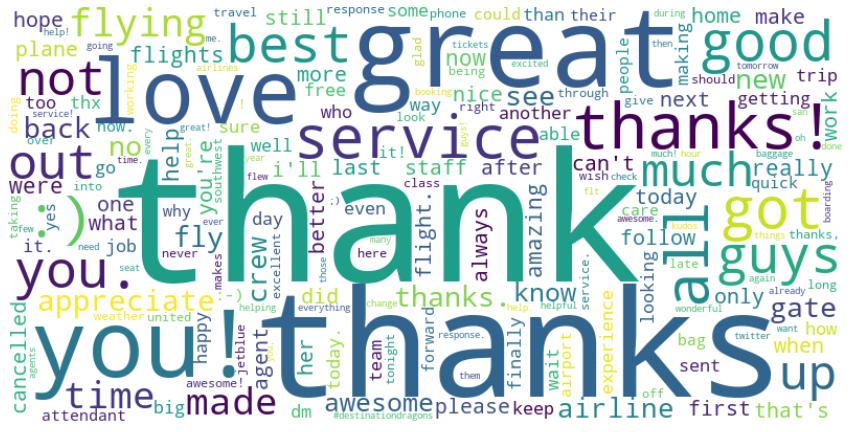

In [35]:
print("Wordcloud for Word Frequency from all Positive Feedback")

positive_wordcloud = WordCloud(background_color="white", width=800, height=400)
positive_wordcloud.generate_from_frequencies(positive_dict)
plt.figure(figsize=(15,10))
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The positive feedback wordcloud accords with our previous observation from the list and bar chart. "thank", "thanks", and "great" are the three most frequently appearing words for positive feedback on social media.

From the observation and analysis above, we can see that some of the words in hypothesis are the most frequently appeared ones in Tweets, while others are not. For negative feedbacks, it looks like most of the negative feedbacks are related to flight cancellation, rather than airline quality problems such as "rude" and "dirty". For neutral feedbacks, "please" does have high frequency, but "help", "travel", "airline" and "fine" are not. The actual words are "how", "what" and "when", which means people are more likely to question those airlines on social media when their experiences are neutral. For positive feedbacks, "thanks" and "love" do have high word frequency, but others are not. Other most frequent words are "great" and "you!". The exclamation point here shows the excitement and appreciation of customers. 

Therefore, the hypothesis is partially true, and partially false.

## Question 3. Create a model which can identify airline sentiments of future Tweets.

After getting the word frequencies, we can build a classifer that can identify airline sentiments of future Tweets. Therefore, in order to see whether the feedback is positive, neutral or negative, people do not need to read those and classify them manually. Both airlines and interested readers can use the classifier to see the sentiment of a specific Tweet. Such classifier would make things easier for airlines to analyze future feedback, and improve their quality accordingly.

Since we have 14,640 rows in the dataset, we can divide all rows in to training set and testing set. Usually, the proportion of training set versus testing set is 8:2. So we can have first 11,712 rows for the training set, and the rest 2928 rows for the testing set. For this question specifically, two columns will be useful. One is 'text', which is showing the actual contents of every Tweets. The other is 'airline_sentiment', which shows whether that Tweet is positive, neutral, or negative. In this question, we put 'text' as parameter, and 'airline_sentiment' as label.

In [36]:
X_train = tweets.loc[:11711, 'text'].values
Y_train = tweets.loc[:11711, 'airline_sentiment'].values
X_test = tweets.loc[11712:, 'text'].values
Y_test = tweets.loc[11712:, 'airline_sentiment'].values

Then we can make use of TfidfVecterizer to transfer Tweet contents into vectors, in order to train the model.

In [37]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

print("The shape of train vector is", train_vectors.shape)
print("The shape of test vector is", test_vectors.shape)

The shape of train vector is (11712, 12249)
The shape of test vector is (2928, 12249)


From [https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html] page in sklearn documentation, we can know which model we should use.

- The dataset sample amount is larger than 50.
- The model should predict a category.
- We have labeled data.
- The dataset sample amount is smaller than 100K.
- We have text data.

According to the machine learning map page, we can try both linear SVC (Support Vector Classification) model and Naive Bayes model, and choose the one with higher accuracy.

In [38]:
svc = svm.SVC()
clf = svc.fit(train_vectors, Y_train)

In [39]:
predicted = clf.predict(test_vectors)
print("Predicted result:", predicted)
print("Accuracy score from linear SVC model:", accuracy_score(Y_test, predicted))

Predicted result: ['negative' 'negative' 'positive' ... 'neutral' 'negative' 'negative']
Accuracy score from linear SVC model: 0.8159153005464481


In [40]:
nb = MultinomialNB()
clf2 = nb.fit(train_vectors, Y_train)

In [41]:
predicted2 = clf2.predict(test_vectors)
print("Predicted result:", predicted2)
print("Accuracy score from Naive Bayes model:", accuracy_score(Y_test, predicted2))

Predicted result: ['negative' 'negative' 'neutral' ... 'negative' 'negative' 'negative']
Accuracy score from Naive Bayes model: 0.7506830601092896


As you can see, 0.816 is larger than 0.751. Therefore, SVC model has a higher accuracy score compared to Naive Bayes model. The actual accuracy is a little bit higher than the one we predicted in the hypothesis section, which is 70% to 80%. 

Now, the model clf can be used to predict airline sentiments of future Tweets. This can make data analysts' work much easier, and can also help those airlines see what might be the reasons for their negative feedbacks. Then, they can improve their flights, services, and quality accordingly. Finally, they can make more profits by appropriately analyzing such user feedback data.

# Ethics & Privacy

Since we need to consider ethics and pricavy issues across the whole data science process, we are splitting that parts into four sections, question asked, data collected, data being used, bias in data, and question asked & analysis.

## Data Collected

Social media is a platform for people to share their thoughts, altogether forming a practical source for the collection of public data. When we were asked about how our data are stored and processed, however, to many of us, it remains somewhat mysterious. For example, Twitter's users have gone through the privacy agreements during account creation, but when they tweet about their life, it was not apparent that anyone can investigate their data related to them at any moment. Twitter's privacy page (https://twitter.com/en/privacy) claims that “Twitter is public[,] and Tweets are immediately viewable and searchable by anyone.” Social media companies only provide services if people have already agreed to be "exposed." Many users overlook the option to make tweets private and friends-only while posting under the default option - public. Therefore, they often lost the lawsuits on blaming the social media companies for sharing their information.

As researchers, we are allowed to collect data from companies such as Twitter today. However, the current status does not imply the privacy policies will hold forever. If potential law enforces a new policy, it might lead to a potential violation of human rights because, as some may claim, “awareness does not mean consent.” 

## Data being used

Considering many research topics based on public data, it may inevitably require some identifiable data points about any user (e.g. name, age, work, ...). As the responsibility of researchers on the dataset, we shall not include sensitive information that might directly (or indirectly) expose the real "who" from the pool of test users from whom we collect the data. In other words, it is on us to maintain ethics and transform the data to be anonymous. This way, we not only benefit from more effective training for our machine learning models, but it also avoids potential threats to the innocent ones who are not aware of their privacy expositions. It comes down to how researchers standardize their data to not be unethically discriminative. It is important to treat subjective matters in objective terms. For example, if a tweet says “someone on someday did something," in our test case, we should extract the “something” as its only representation of the data point. Researchers are responsible for making users anonymous enough, so judgments on people's age, gender, color, ethnicity, religion, or any other discriminative categories are avoided. In our dataset, columns such as "names," "tweet_location," "tweet_coord" are ought to be cleaned out or randomized. The data may be biased, but the researcher should not be biased. 

## Bias in Data

It is possible that posts are mixed with emotional bias and garbage content. These posts can include un-meaningful information such as political propaganda or automated advertisements. Then, the data itself may be unethical due to different standards of certain online communities. If some content written in foreign language may have a completely different interpretation after being translated into English, we should avoid such data point failure as well. Some datasets (comments) are not reliable information despite people relating to them. Such datasets may contain uses of stereotypes and false claims that emotionally appeal to popular cultural beliefs. It is the bias in data we may not comprehensively control but be aware of for a better insight on our findings.

## Question Asked & Analysis

After our team standardized the data and learned the trends, the results may be against or too indifferent regarding the possible outcomes we may expect from our research topics. The question made clear categories of positive feedback, neutral feedback, and negative feedback, however, the analysis includes some indefinite views that we find difficult to be utilized as decent supporting proofs to answer questions we have before the study. For example, in the first iteration of our finding, indefinite words such as “when”, “how”, “canceled”, and “policy” appear to be important, but they either are some meaningless parts of a sentence or pronouns added to obey English grammar. Although it was extremely helpful to the team's progress for us to stay curious and ask questions to improve the findings. Could we handpick the dataset such that the majority of words are descriptive? Could we design a different prototype that selects with some more bias? Although what we found was heavily flavored by the negative feedback, it is important to keep in mind that while we make design decisions, we shall remain cautious ethically. Our ethics and objectivity are what make the discovery convincing. 

# Conclusion & Discussion

Our project can conclude that twitter comments towards US Airlines are typically negative. This is clearly seen with the data shown in part 1 of question 1. Part 2 of question 1 actually disproved our hypothesis, because US airways clearly received more negative feedback than United Airlines. This is surprising because despite the bad publicity United Airlines received, US airways and even American Airlines had a higher percentage of negative comments. One possible explanation is that US airways and American Airlines announced a merge in February of 2013[6]. This is significant because it is possible that during this merge, American Airlines and US Airways had a lot of internal issues to take care of thus leading to a decline in customer service. Furthermore, it is possible to argue that US airways had to merge with American Airlines because they were doing poorly to begin with. This could explain the possible reasons why United did not have the highest percentage of negative reviews.

Furthermore, our project discovered that in these comments, the top 5 negative words were "no", "not", "cancelled", "now" and "service" and these had a frequency of 1271, 1213, 911, 643 and 541 respectively. Surprisingly, only two of these words matched with our predictions in the hypothesis. We did not expect to see words like no or not, but it makes complete sense to have those words be common in negative comments. The top 5 neutral words were "need", "please", "how", "what", and "when". This makes a lot of sense because question words tend to be neutral. None of these top 5 neutral words matched with our hypothesis. The top 5 positive words were "thank", "thanks", "great", "love", and "you!". This makes sense as a lot of positive comments tend to just be thank yous to the airlines. Our hypothesis was pretty accurate because we included thanks and synonyms of "good". All in all, positive comments are pretty simple to predict but for negative and neutral comments it is different because they can be literally about anything. This makes negative and neutral comments harder to predict.

At last, our model was able to make an SVC model with 81% accuracy to predict airline sentiments of future tweets. In our hypothesis we only predicted that our accuracy would be around 70%-80% so we beat that by a tiny margin, but it is still safe to say that our hypothesis is somewhat correct in that certain specific keywords may skew categorizations because of how often they occur.

The limitations of this project include our limited dataset, possibly incorrect sentiment typing and the usage of certain words more than others. Ideally, if we had infinite data, with perfect sentiment prediction and a realistic usage of words for each sentiment type, then this analysis could definitely be more thoroughly done. However, we can still conclude that negative type feedback will be the most dominant and that US Airways for the month of February in 2015 received the most negative feedback.

# Reference

1. Nabi, Javaid. “Machine Learning - Text Processing.” Medium, Towards Data Science, 24 June 2019, towardsdatascience.com/machine-learning-text-processing-1d5a2d638958.
2. Pedregosa, et al. “1.4. Support Vector Machines.” Scikit, 2011, scikit-learn.org/stable/modules/svm.html.
3. Pedregosa, et al. “Choosing the Right Estimator.” Scikit, 2011, scikit-learn.org/stable/tutorial/machine_learning_map/index.html.
4. “Privacy Policy.” Twitter, Twitter, 28 May 2018, twitter.com/en/privacy.
5. Vu, Duong. “(Tutorial) Generate Word Clouds in Python.” DataCamp Community, 8 Nov. 2019, www.datacamp.com/community/tutorials/wordcloud-python.
6. Wikipedia contributors. "US Airways." Wikipedia, The Free Encyclopedia. Wikipedia, The Free Encyclopedia, 17 Nov. 2019. Web. 10 Dec. 2019. 